## 차원 축소, 특성 추출, 매니폴드 학습(Dimensionality Reduction, Characterization Extraction, Manifold Learning)
* 비지도 학습을 사용해 데이터를 변환하는 이유는 여러가지입니다. 가장 일반적인 동기는 시각화하거나, 데이터를 압축하거나, 추가적인 처리를 위해 정보가 더 잘 드러나는 표현을 찾기 위해서입니다.
* 이번 절에서는 이런 용도로 가장 간단하고 흔히 사용하는 알고리즘인 주성분 분석(principal component analysis, PCA)을 소개합니다. 그리고 특성 추출에 널리 사용하는 비음수 행렬 분해(non-negative matrix factorization, NMF)와 2차원 산점도를 이용해 시각화 용도로 많이 사용하는 t-SNE(t-distributed stochastic neighbor embedding)알고리즘도 살펴보겠습니다.
### 주성분 분석(PCA)
* 주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술입니다. 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택됩니다. 다음 예제는 인위적으로 만든 2차원 데이터셋을 사용하여 PCA 효과를 나타낸 것입니다.

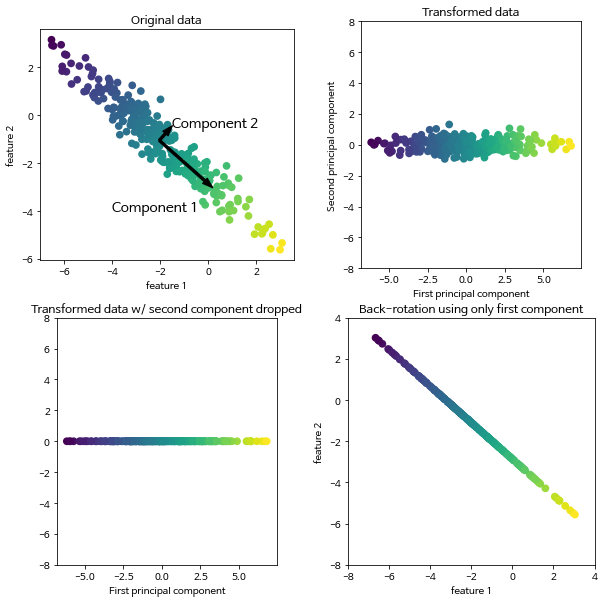

In [1]:
import mglearn
mglearn.plots.plot_pca_illustration()

[PCA(Principay Component Analysis)를 이용한 데이터 변환(Data Conversion by using PCA)]

### PCA를 적용해 유방암 데이터셋 시각화하기

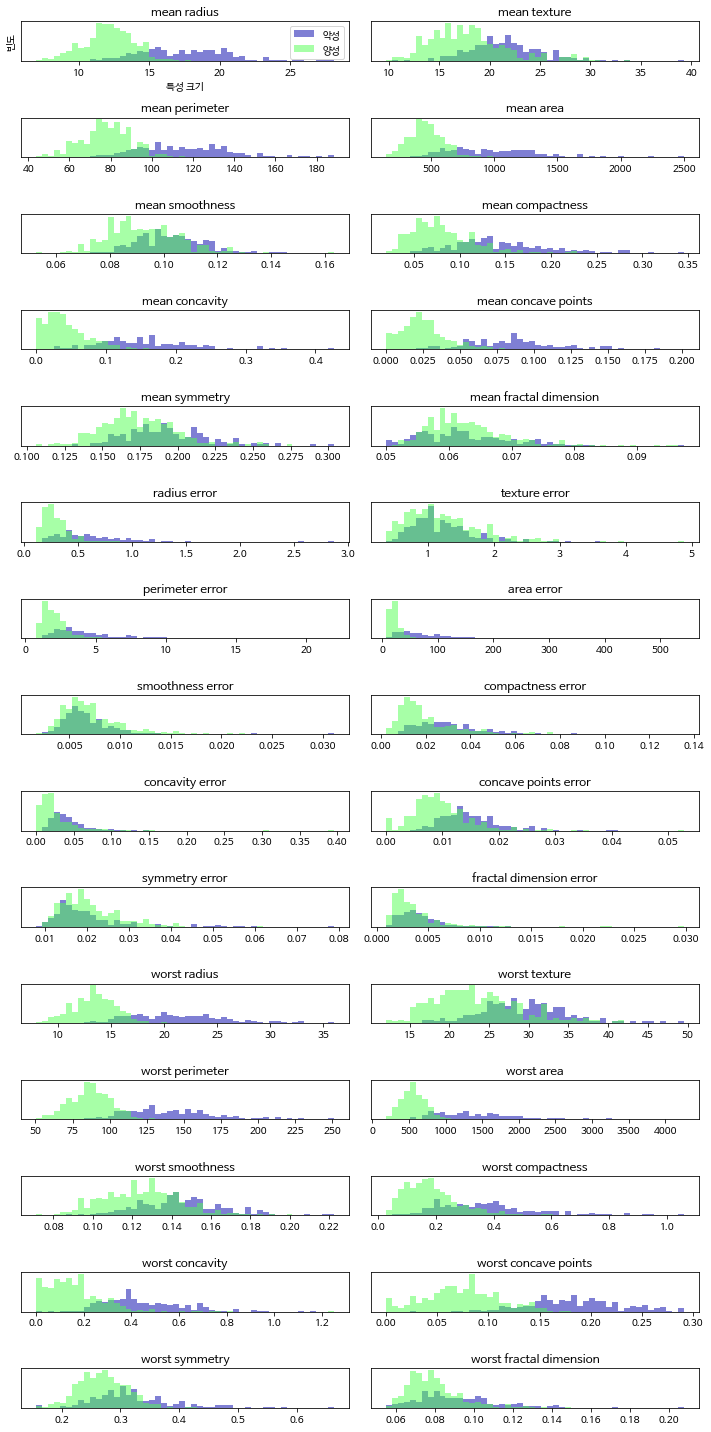

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

* PCA를 적용하기 전에 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 데이터의 스케일을 조정합니다.

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

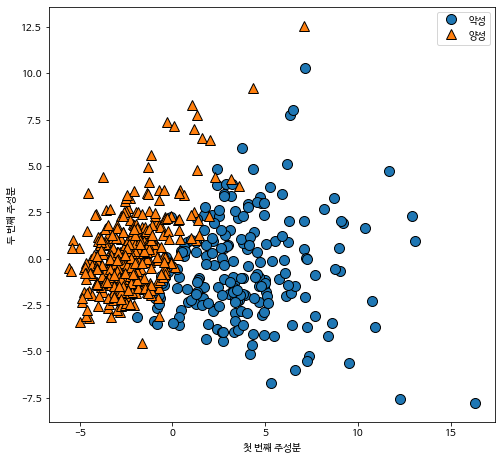

In [13]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

[처음 두 개의 주성분을 사용해 그린 유방암 데이터셋의 2차원 선점도]

In [14]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [15]:
print("PCA 주성분 형태:", pca.components_)

PCA 주성분 형태: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

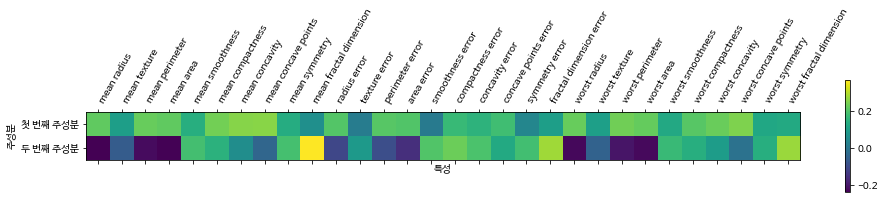

In [18]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

[유방암 데이터셋에서 찾은 처음 두 개의 주성분 히트맵]

### 고유얼굴(eigenface) 특성 추출
* PCA를 이용하여 LFW(Labeld Faces in the Wild) 데이터셋의 얼굴 이미지에서 특성을 추출하는 아주 간단한 애플리케이션을 만들어보겠습니다.

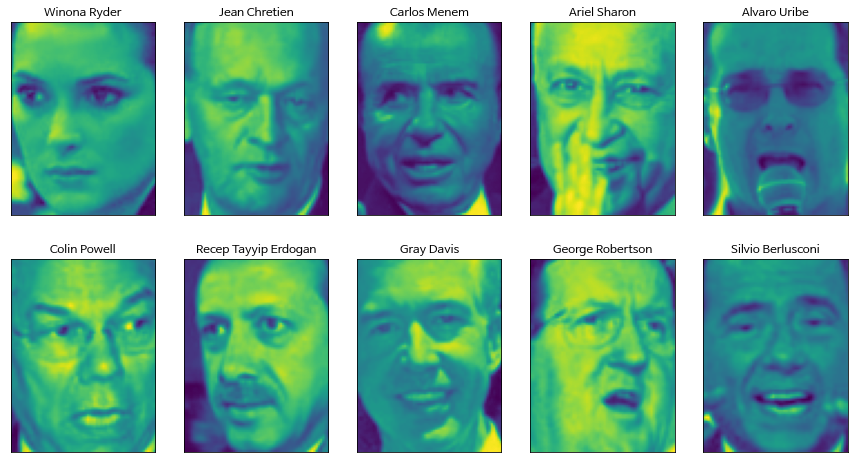

In [2]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

[LFW 데이터셋에 있는 이미지의 샘플]
* LFW 데이터셋에는 62명의 얼굴을 찍은 이미지와 총 3,023개가 있으며 각 이미지의 크기는 87 X 65 픽셀입니다.

In [3]:
print("people.images.shape:", people.images.shape)
print("클래스 개수", len(people.target_names))

people.images.shape: (3023, 87, 65)
클래스 개수 62


* 이 데이터셋은 조금 편중되어서, 다음에서 볼 수 있듯이 조지부시와 콜린 파월의 이미지가 많습니다.

In [7]:
# 각 타깃이 나타난 횟수 계산
import numpy as np
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='  ')
    if (i + i) % 3 == 0:
        print()

Alejandro Toledo           39  
Alvaro Uribe               35  Amelie Mauresmo            21  Andre Agassi               36  
Angelina Jolie             20  Ariel Sharon               77  Arnold Schwarzenegger      42  
Atal Bihari Vajpayee       24  Bill Clinton               29  Carlos Menem               21  
Colin Powell              236  David Beckham              31  Donald Rumsfeld           121  
George Robertson           22  George W Bush             530  Gerhard Schroeder         109  
Gloria Macapagal Arroyo    44  Gray Davis                 26  Guillermo Coria            30  
Hamid Karzai               22  Hans Blix                  39  Hugo Chavez                71  
Igor Ivanov                20  Jack Straw                 28  Jacques Chirac             52  
Jean Chretien              55  Jennifer Aniston           21  Jennifer Capriati          42  
Jennifer Lopez             21  Jeremy Greenstock          24  Jiang Zemin                20  
John Ashcroft              5

* 데이터셋의 편중을 없애기 위해 사람마다 50개의 이미지만 선택하겠습니다(이렇게 하지 않으면 조지 부시 이미지에 치우친 특성이 추출됩니다).

In [9]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# MinMaxScaler를 적용하는 것과 거의 같습니다.
X_people = X_people / 255.

c:\users\wnstj\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


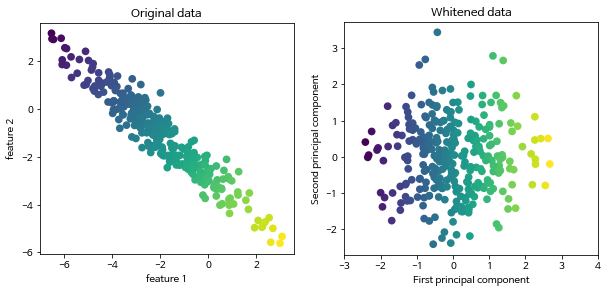

In [13]:
import mglearn
mglearn.plots.plot_pca_whitening()

[화이트닝 옵션을 사용한 PCA 데이터 전환]

* PCA 객체를 훈련 데이터로 학습시켜서 처음 100개의 주성분을 추출합니다. 그런 다음 훈련 데이터와 테스트 데이터를 변환합니다.

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape", X_train_pca.shape)

X_train_pca.shape (1547, 100)


* 새 데이터는 처음 100개의 주성분에 해당하는 특성을 가집니다. 이제 이 데이터를 사용해 1-최근접 이웃 분류기로 이미지를 분류해보겠습니다.

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


* 모델의 정확도가 23%에서 31%로 크게 향상되었으므로 주성분이 데이터를 더 잘 표현한다고 직관적으로 판단할 수 있습니다.
* 이미지 데이터일 경우엔 계산한 주성분을 쉽게 시각화할 수 있습니다. 주성분이 나타내는 것은 입력 데이터 공간에서의 어떤 방향이라는 것을 기억하세요. 입력 차원은 87 X 65 픽셀의 흑백 이미지이고, 따라서 이 공간의 어떤 방향도 87 X 65 픽셀의 흑백 이미지입니다.

In [18]:
print("pca.components_.shape:", pca.components_.shape)

pca.components_.shape: (100, 5655)


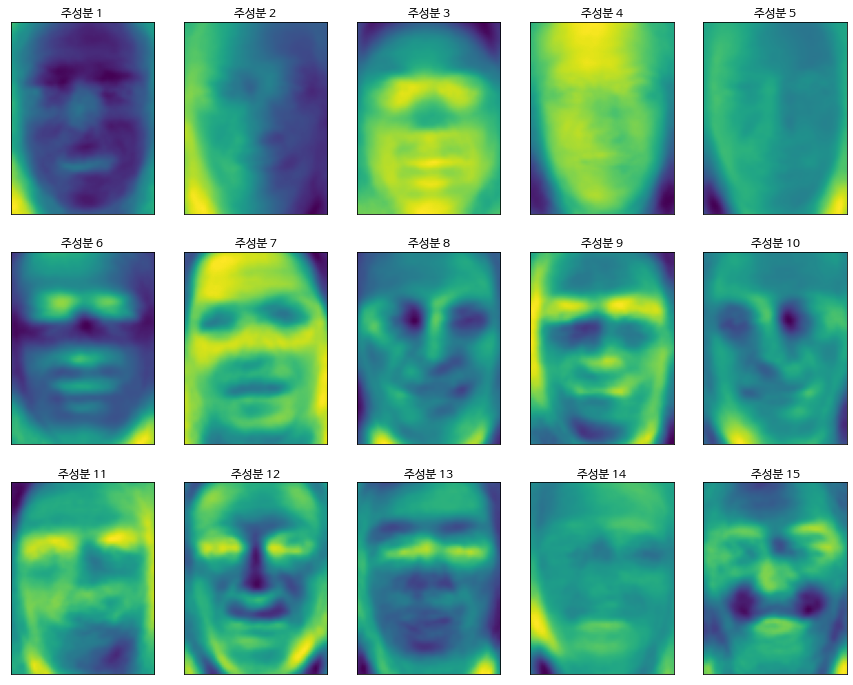

In [20]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i + 1)))

[얼굴 데이터셋의 주성분 중 처음 15개]

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.539869, ..., 0.243137],
       ...,
       [0.043137, ..., 0.593464]], dtype=float32), 
array([[0.237908, ..., 0.267974],
       ...,
       [0.401307, ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 7.6s, 0.1min


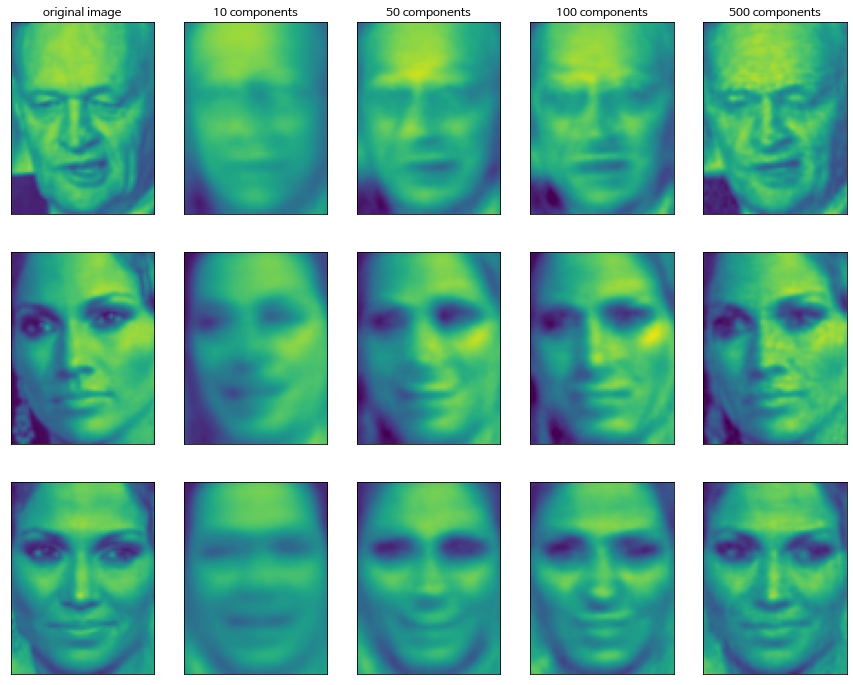

In [21]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

[주성분 개수에 따른 세 얼굴 이미지의 재구성]